Строим векторную карту по усредненным векторам фильтрованной скорости пока по 1 мыши

In [1]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d


C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

def addFilteredV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

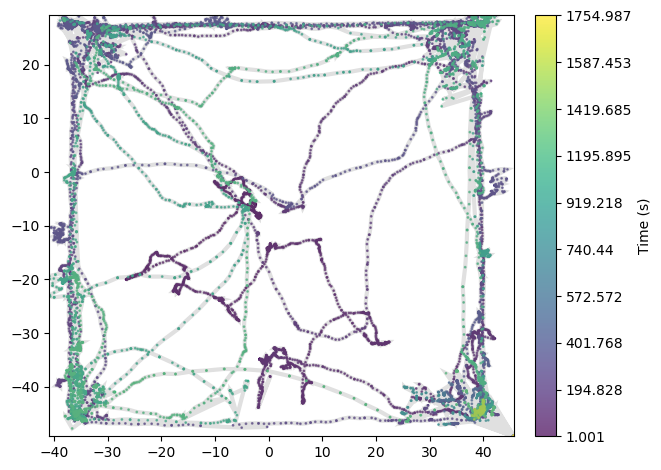

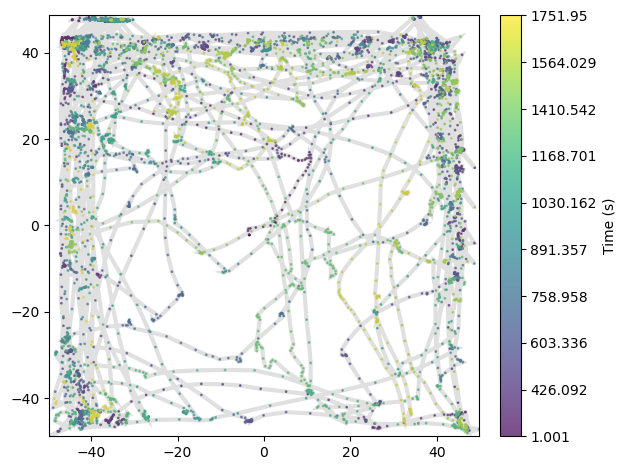

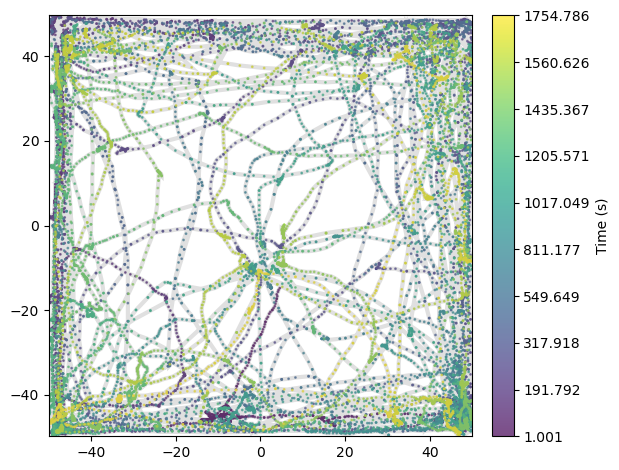

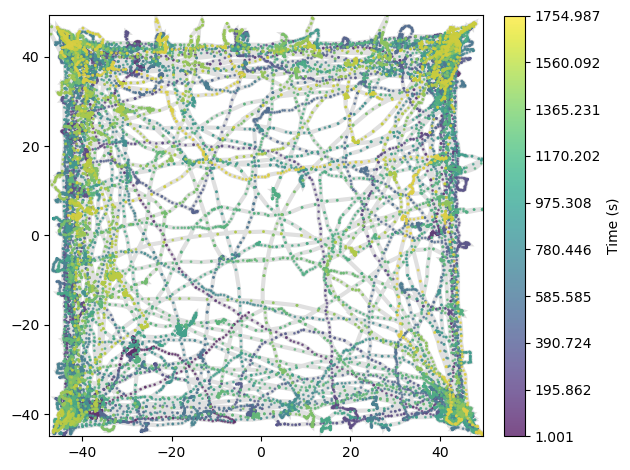

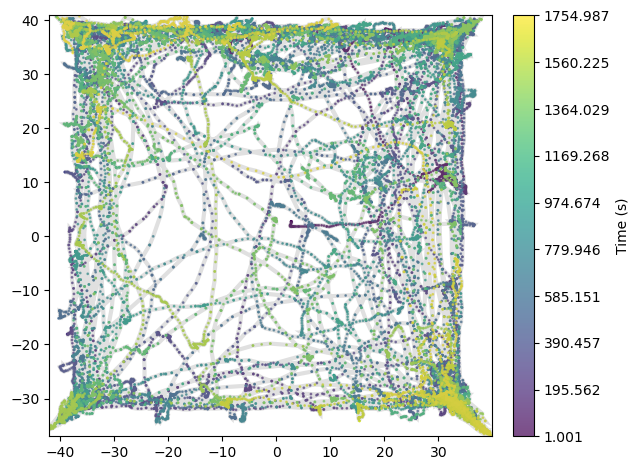

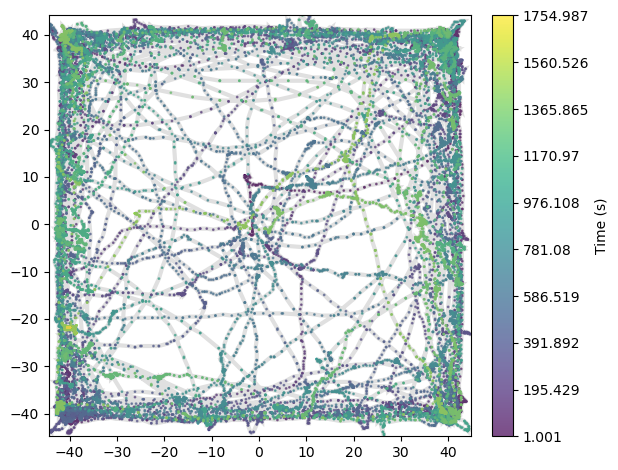

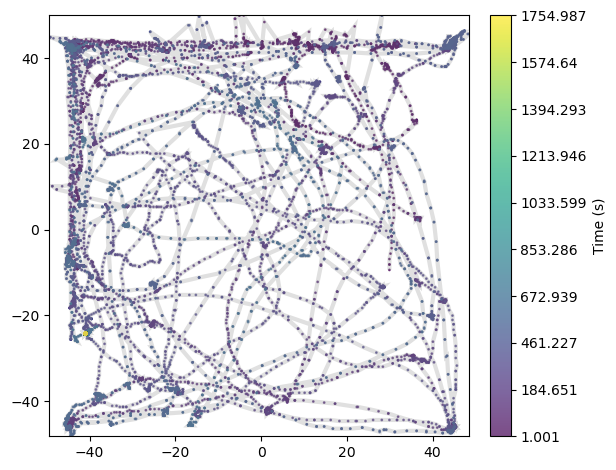

In [3]:
tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
dfs = [tr4, tr3, tr5, tr6, tr7, tr91, tr92]
names = ['tr4','tr3','tr5','tr6','tr7', 'tr91','tr92']

### V (x) для всех мышек

In [6]:
%matplotlib inline

In [7]:
def addRawV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    return(df)

           time       x       y
0         1.001  -3.355  -5.324
1         1.034  -3.355  -5.324
2         1.068  -3.355  -5.324
3         1.101  -3.355  -5.324
4         1.134  -3.282  -5.324
...         ...     ...     ...
45184  1754.853  45.655 -49.228
45185  1754.886  45.655 -49.228
45186  1754.920  45.655 -49.228
45187  1754.953  45.655 -49.228
45188  1754.987  45.655 -49.228

[45189 rows x 3 columns] raw
           time       x       y
0         1.001  -3.355  -5.324
1         1.034  -3.355  -5.324
2         1.068  -3.355  -5.324
3         1.101  -3.355  -5.324
4         1.134  -3.282  -5.324
...         ...     ...     ...
45184  1754.853  45.655 -49.228
45185  1754.886  45.655 -49.228
45186  1754.920  45.655 -49.228
45187  1754.953  45.655 -49.228
45188  1754.987  45.655 -49.228

[45189 rows x 3 columns] filtered
          time       x      y
0        1.001  -3.409 -2.178
1        1.134  -3.409 -2.178
2        1.268  -3.409 -2.178
3        1.401  -3.693 -1.231
4        1.535  -

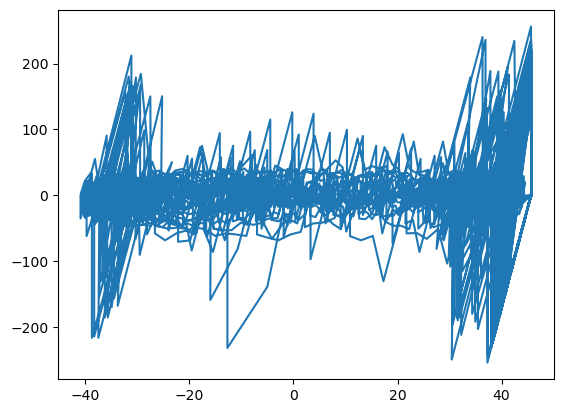

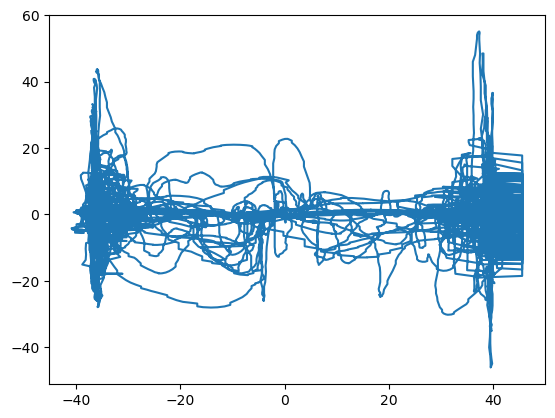

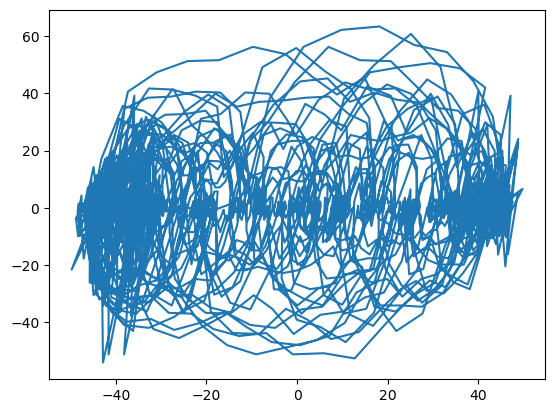

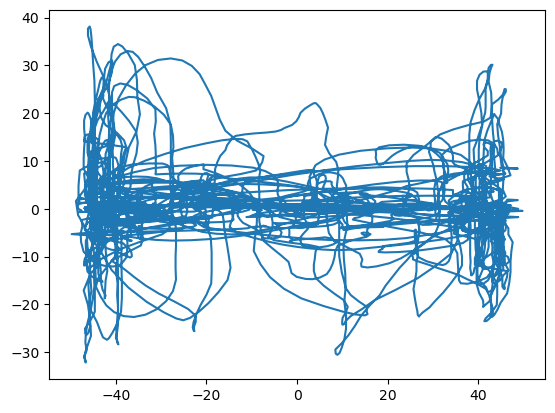

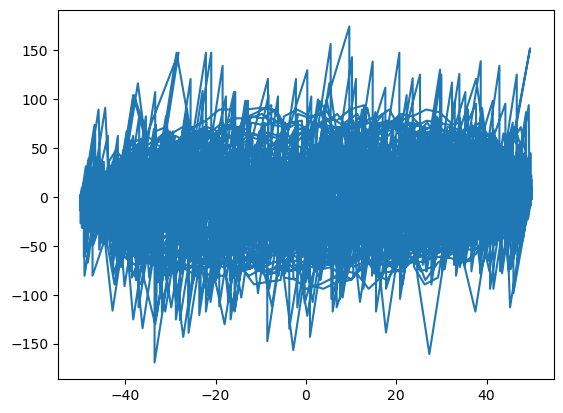

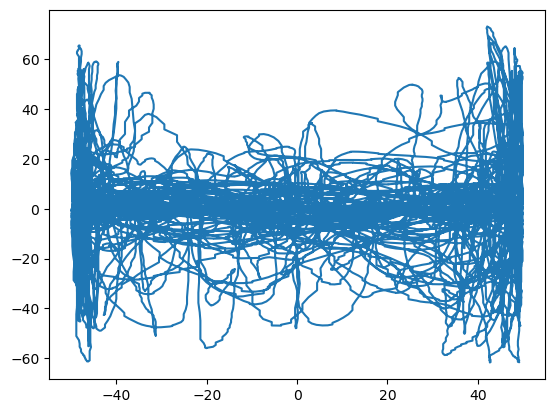

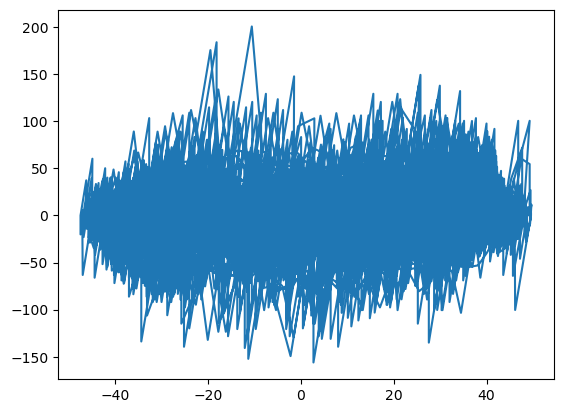

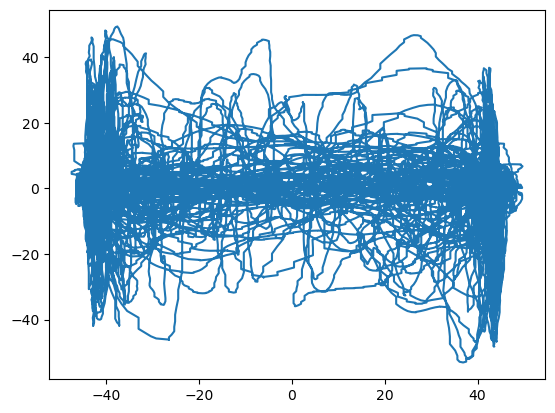

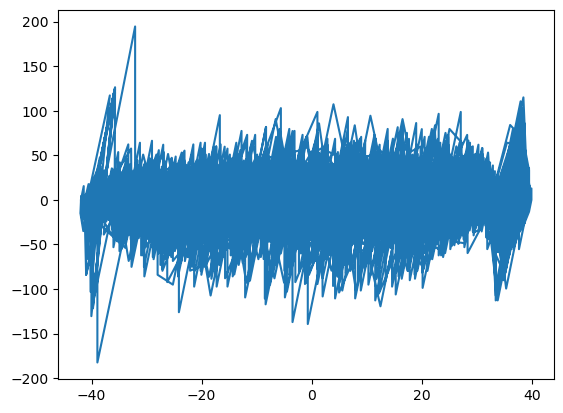

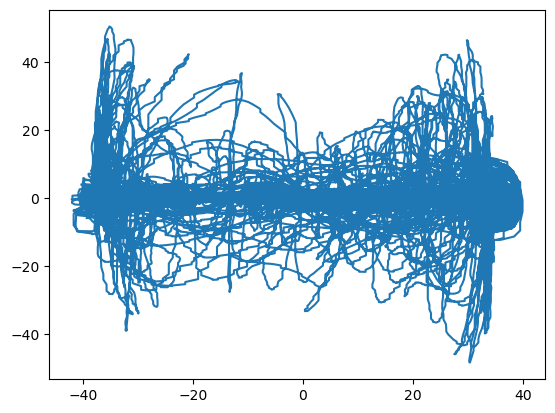

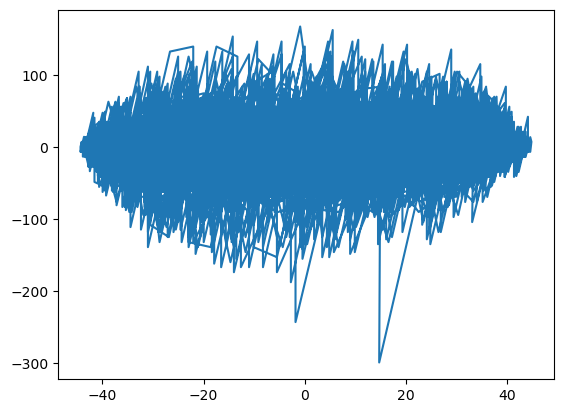

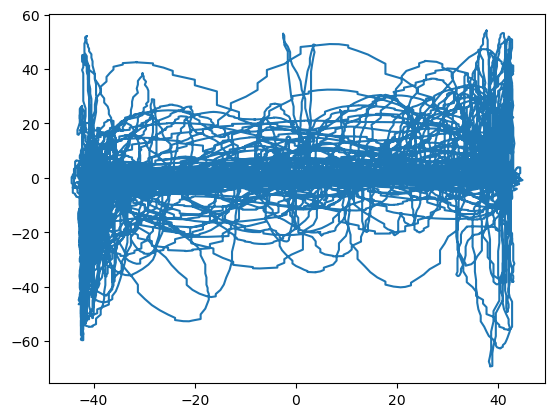

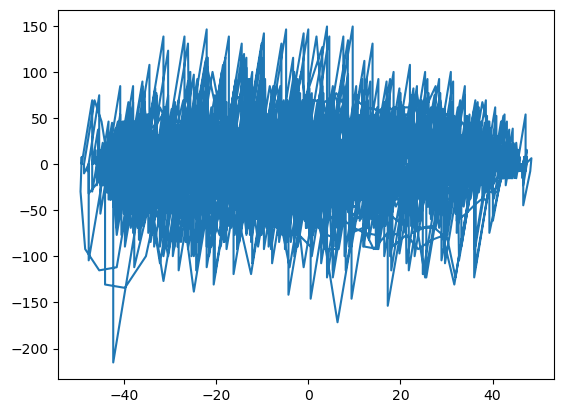

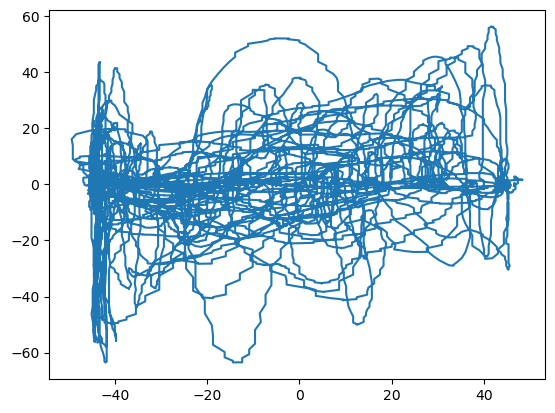

In [8]:
for i in dfs:
    ii = i.copy()
    iii = i.copy()
    dfraw = addRawV(ii)
    dffilt = addFilteredV(iii)
    print(str(i), "raw")
    plt.figure()
    plt.plot(dfraw['x'], dfraw['Vx'])
    print(str(i), "filtered")
    plt.figure()
    plt.plot(dffilt['x'], dffilt['Vx'])

In [9]:
plt.plot(df['time'], df['x'])
xfilt = pd.Series(gaussian_filter1d(df['x'], 5))
plt.plot(df['time'], xfilt)

NameError: name 'df' is not defined

### 3d

In [9]:
from mpl_toolkits import mplot3d
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [ ]:
df = openFile('Trace_7.txt')
df = addFilteredV(df)

In [51]:
df

time       x       y        Vx         Vy         V
0         1.001   2.771   2.771 -1.020664   0.000000  1.060714
1         1.034   2.771   2.771 -1.061949   0.000000  1.109922
2         1.068   2.771   2.771 -1.140741   0.000000  1.205239
3         1.101   2.771   2.698 -1.249830  -2.212121  1.340646
4         1.134   2.771   2.626 -1.378875  -2.181818  1.507519
...         ...     ...     ...       ...        ...       ...
52480  1754.853 -37.997  35.226 -7.165181 -13.242424  8.685303
52481  1754.886 -37.705  34.715 -7.519928 -15.484848  8.991229
52482  1754.920 -37.705  34.715 -7.821590   0.000000  9.241747
52483  1754.953 -37.632  34.205 -8.040699 -15.454545  9.418891
52484  1754.987 -37.632  33.913 -8.155799  -8.588235  9.510554

[52485 rows x 6 columns]

In [13]:
ax = plt.axes(projection='3d')

ax.scatter3D(df['x'], df['y'], df['V'], c=df['V'], cmap='Greens');

### Draft (после черновика будет векторное поле)

In [6]:
df

time       x       y        Vx         Vy         V
0         1.001   2.771   2.771 -1.020664   0.000000  1.060714
1         1.034   2.771   2.771 -1.061949   0.000000  1.109922
2         1.068   2.771   2.771 -1.140741   0.000000  1.205239
3         1.101   2.771   2.698 -1.249830  -2.212121  1.340646
4         1.134   2.771   2.626 -1.378875  -2.181818  1.507519
...         ...     ...     ...       ...        ...       ...
52480  1754.853 -37.997  35.226 -7.165181 -13.242424  8.685303
52481  1754.886 -37.705  34.715 -7.519928 -15.484848  8.991229
52482  1754.920 -37.705  34.715 -7.821590   0.000000  9.241747
52483  1754.953 -37.632  34.205 -8.040699 -15.454545  9.418891
52484  1754.987 -37.632  33.913 -8.155799  -8.588235  9.510554

[52485 rows x 6 columns]

In [9]:
dfn

time          x          y  \
x                  y                                                       
[-42.008, -33.818) [-36.976, -29.194)  1057.135696 -37.516078 -31.717304   
                   [-29.194, -21.413)   837.894409 -36.061986 -26.394755   
                   [-21.413, -13.631)   668.811869 -36.858476 -17.273468   
                   [-13.631, -5.849)    672.352891 -36.267836 -10.623400   
                   [-5.849, 1.933)      962.092308 -36.691348  -2.570764   
...                                            ...        ...        ...   
[31.703, 39.893)   [1.933, 9.714)       638.158891  33.776337   6.453900   
                   [9.714, 17.496)      531.160649  32.820476  12.418892   
                   [17.496, 25.278)     931.848869  33.145159  21.852177   
                   [25.278, 33.059)     788.879207  33.704534  30.001035   
                   [33.059, 40.841)     835.579742  33.626829  37.255407   

                                              Vx         Vy          V  
x                  y                                                    
[-42.008, -33.818) [-36.976, -29.194)   0.056735  -0.082922   5.811733  
                   [-29.194, -21.413)   2.302335   1.812681   7.638484  
                   [-21.413, -13.631)   6.737363   6.686668  12.252220  
                   [-13.631, -5.849)   13.605416  13.801426  20.012288  
                   [-5.849, 1.933)      3.282487   3.533674   8.570558  
...                                          ...        ...        ...  
[31.703, 39.893)   [1.933, 9.714)      -2.519007  -2.621842   8.843875  
                   [9.714, 17.496)     -2.095807  -2.093330   7.778019  
                   [17.496, 25.278)    -2.057626  -1.763169  10.303211  
                   [25.278, 33.059)    -1.990739  -1.919388   8.263290  
                   [33.059, 40.841)    -0.179612  -0.115837   4.851812  

[100 rows x 6 columns]

In [58]:
print(df['Vx'].mean())

0.013525868078553603


In [64]:
dfvx

Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.008, -33.818)           0.056735           2.302335           6.737363   
[-33.818, -25.628)          -0.579547           0.694244          -4.341549   
[-25.628, -17.438)           0.007894           0.971818           2.284817   
[-17.438, -9.248)           -0.572950          -4.180377          -1.983606   
[-9.248, -1.057)            -0.048144          -0.962527          -9.989886   
[-1.057, 7.133)             -1.430029           0.168260           2.177460   
[7.133, 15.323)             -0.262698          -2.869928          -3.371897   
[15.323, 23.513)             0.471057           2.141794           4.069103   
[23.513, 31.703)            -0.009883           1.266203           5.823657   
[31.703, 39.893)            -0.175788          -2.633299         -12.837345   

                                                                     \
y                  [-13.631, -5.849) [-5.849, 1.933) [1.933, 9.714)   
x                                                                     
[-42.008, -33.818)         13.605416        3.282487       8.088729   
[-33.818, -25.628)         -3.838120        1.538067      -1.326689   
[-25.628, -17.438)         -6.672581       -0.534998      10.400380   
[-17.438, -9.248)          10.920366        0.617742       8.448124   
[-9.248, -1.057)           -5.097686       -3.302989      -3.587069   
[-1.057, 7.133)            -3.099931       -2.395923      -4.974538   
[7.133, 15.323)             5.194663       -1.228487      -2.652571   
[15.323, 23.513)            2.488817       -0.322764      -0.024386   
[23.513, 31.703)            0.723502        3.922978       6.718032   
[31.703, 39.893)           -5.568032       -7.883956      -2.519007   

                                                                      \
y                  [9.714, 17.496) [17.496, 25.278) [25.278, 33.059)   
x                                                                      
[-42.008, -33.818)        2.885702         3.312529         2.195467   
[-33.818, -25.628)       -3.459337        -2.202138        -0.278436   
[-25.628, -17.438)        1.345418         3.064508        -3.005304   
[-17.438, -9.248)         2.937399         4.752177         3.423753   
[-9.248, -1.057)         -2.877047         1.463654         0.244574   
[-1.057, 7.133)          -6.346352        -5.597155        -0.661680   
[7.133, 15.323)          -1.013654        -6.168381         1.010588   
[15.323, 23.513)         -0.425503        -1.642162         2.508837   
[23.513, 31.703)          2.161611         0.882436        -0.632742   
[31.703, 39.893)         -2.095807        -2.057626        -1.990739   

                                     
y                  [33.059, 40.841)  
x                                    
[-42.008, -33.818)         0.170478  
[-33.818, -25.628)         0.085791  
[-25.628, -17.438)        -0.143039  
[-17.438, -9.248)          0.487142  
[-9.248, -1.057)          -0.043377  
[-1.057, 7.133)            0.436324  
[7.133, 15.323)            0.089277  
[15.323, 23.513)           0.017585  
[23.513, 31.703)          -0.069140  
[31.703, 39.893)          -0.179612

In [69]:
dfvx.iloc[0][1]

2.302334995264591

In [66]:
dfvx

Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.008, -33.818)           0.056735           2.302335           6.737363   
[-33.818, -25.628)          -0.579547           0.694244          -4.341549   
[-25.628, -17.438)           0.007894           0.971818           2.284817   
[-17.438, -9.248)           -0.572950          -4.180377          -1.983606   
[-9.248, -1.057)            -0.048144          -0.962527          -9.989886   
[-1.057, 7.133)             -1.430029           0.168260           2.177460   
[7.133, 15.323)             -0.262698          -2.869928          -3.371897   
[15.323, 23.513)             0.471057           2.141794           4.069103   
[23.513, 31.703)            -0.009883           1.266203           5.823657   
[31.703, 39.893)            -0.175788          -2.633299         -12.837345   

                                                                     \
y                  [-13.631, -5.849) [-5.849, 1.933) [1.933, 9.714)   
x                                                                     
[-42.008, -33.818)         13.605416        3.282487       8.088729   
[-33.818, -25.628)         -3.838120        1.538067      -1.326689   
[-25.628, -17.438)         -6.672581       -0.534998      10.400380   
[-17.438, -9.248)          10.920366        0.617742       8.448124   
[-9.248, -1.057)           -5.097686       -3.302989      -3.587069   
[-1.057, 7.133)            -3.099931       -2.395923      -4.974538   
[7.133, 15.323)             5.194663       -1.228487      -2.652571   
[15.323, 23.513)            2.488817       -0.322764      -0.024386   
[23.513, 31.703)            0.723502        3.922978       6.718032   
[31.703, 39.893)           -5.568032       -7.883956      -2.519007   

                                                                      \
y                  [9.714, 17.496) [17.496, 25.278) [25.278, 33.059)   
x                                                                      
[-42.008, -33.818)        2.885702         3.312529         2.195467   
[-33.818, -25.628)       -3.459337        -2.202138        -0.278436   
[-25.628, -17.438)        1.345418         3.064508        -3.005304   
[-17.438, -9.248)         2.937399         4.752177         3.423753   
[-9.248, -1.057)         -2.877047         1.463654         0.244574   
[-1.057, 7.133)          -6.346352        -5.597155        -0.661680   
[7.133, 15.323)          -1.013654        -6.168381         1.010588   
[15.323, 23.513)         -0.425503        -1.642162         2.508837   
[23.513, 31.703)          2.161611         0.882436        -0.632742   
[31.703, 39.893)         -2.095807        -2.057626        -1.990739   

                                     
y                  [33.059, 40.841)  
x                                    
[-42.008, -33.818)         0.170478  
[-33.818, -25.628)         0.085791  
[-25.628, -17.438)        -0.143039  
[-17.438, -9.248)          0.487142  
[-9.248, -1.057)          -0.043377  
[-1.057, 7.133)            0.436324  
[7.133, 15.323)            0.089277  
[15.323, 23.513)           0.017585  
[23.513, 31.703)          -0.069140  
[31.703, 39.893)          -0.179612

In [13]:
Vectors.shape

(10, 10, 4)

In [14]:
Vectors[5][7]

array([-1.0575    , 17.4959    , -5.59715458, -4.8171285 ])

In [78]:
Vectors

array([[[-4.20080000e+01, -3.69760000e+01,  5.67346903e-02,
         -8.29224675e-02],
        [-4.20080000e+01, -2.91943000e+01,  2.30233500e+00,
          1.81268077e+00],
        [-4.20080000e+01, -2.14126000e+01,  6.73736336e+00,
          6.68666840e+00],
        [-4.20080000e+01, -1.36309000e+01,  1.36054164e+01,
          1.38014260e+01],
        [-4.20080000e+01, -5.84920000e+00,  3.28248745e+00,
          3.53367434e+00],
        [-4.20080000e+01,  1.93250000e+00,  8.08872887e+00,
          8.34515691e+00],
        [-4.20080000e+01,  9.71420000e+00,  2.88570230e+00,
          2.56546268e+00],
        [-4.20080000e+01,  1.74959000e+01,  3.31252862e+00,
          3.27239089e+00],
        [-4.20080000e+01,  2.52776000e+01,  2.19546727e+00,
          2.38506190e+00],
        [-4.20080000e+01,  3.30593000e+01,  1.70478176e-01,
          2.25791358e-01]],

       [[-3.38179000e+01, -3.69760000e+01, -5.79547419e-01,
         -2.75052670e-01],
        [-3.38179000e+01, -2.91943000e+01

In [10]:
dfvx

Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.008, -33.818)           0.056735           2.302335           6.737363   
[-33.818, -25.628)          -0.579547           0.694244          -4.341549   
[-25.628, -17.438)           0.007894           0.971818           2.284817   
[-17.438, -9.248)           -0.572950          -4.180377          -1.983606   
[-9.248, -1.057)            -0.048144          -0.962527          -9.989886   
[-1.057, 7.133)             -1.430029           0.168260           2.177460   
[7.133, 15.323)             -0.262698          -2.869928          -3.371897   
[15.323, 23.513)             0.471057           2.141794           4.069103   
[23.513, 31.703)            -0.009883           1.266203           5.823657   
[31.703, 39.893)            -0.175788          -2.633299         -12.837345   

                                                                     \
y                  [-13.631, -5.849) [-5.849, 1.933) [1.933, 9.714)   
x                                                                     
[-42.008, -33.818)         13.605416        3.282487       8.088729   
[-33.818, -25.628)         -3.838120        1.538067      -1.326689   
[-25.628, -17.438)         -6.672581       -0.534998      10.400380   
[-17.438, -9.248)          10.920366        0.617742       8.448124   
[-9.248, -1.057)           -5.097686       -3.302989      -3.587069   
[-1.057, 7.133)            -3.099931       -2.395923      -4.974538   
[7.133, 15.323)             5.194663       -1.228487      -2.652571   
[15.323, 23.513)            2.488817       -0.322764      -0.024386   
[23.513, 31.703)            0.723502        3.922978       6.718032   
[31.703, 39.893)           -5.568032       -7.883956      -2.519007   

                                                                      \
y                  [9.714, 17.496) [17.496, 25.278) [25.278, 33.059)   
x                                                                      
[-42.008, -33.818)        2.885702         3.312529         2.195467   
[-33.818, -25.628)       -3.459337        -2.202138        -0.278436   
[-25.628, -17.438)        1.345418         3.064508        -3.005304   
[-17.438, -9.248)         2.937399         4.752177         3.423753   
[-9.248, -1.057)         -2.877047         1.463654         0.244574   
[-1.057, 7.133)          -6.346352        -5.597155        -0.661680   
[7.133, 15.323)          -1.013654        -6.168381         1.010588   
[15.323, 23.513)         -0.425503        -1.642162         2.508837   
[23.513, 31.703)          2.161611         0.882436        -0.632742   
[31.703, 39.893)         -2.095807        -2.057626        -1.990739   

                                     
y                  [33.059, 40.841)  
x                                    
[-42.008, -33.818)         0.170478  
[-33.818, -25.628)         0.085791  
[-25.628, -17.438)        -0.143039  
[-17.438, -9.248)          0.487142  
[-9.248, -1.057)          -0.043377  
[-1.057, 7.133)            0.436324  
[7.133, 15.323)            0.089277  
[15.323, 23.513)           0.017585  
[23.513, 31.703)          -0.069140  
[31.703, 39.893)          -0.179612

In [12]:
binx

array([-42.008 , -33.8179, -25.6278, -17.4377,  -9.2476,  -1.0575,
         7.1326,  15.3227,  23.5128,  31.7029,  39.893 ])

In [11]:
x_cut

0           [-1.057, 7.133)
1           [-1.057, 7.133)
2           [-1.057, 7.133)
3           [-1.057, 7.133)
4           [-1.057, 7.133)
                ...        
52480    [-42.008, -33.818)
52481    [-42.008, -33.818)
52482    [-42.008, -33.818)
52483    [-42.008, -33.818)
52484    [-42.008, -33.818)
Name: x, Length: 52485, dtype: category
Categories (10, interval[float64, left]): [[-42.008, -33.818) < [-33.818, -25.628) < [-25.628, -17.438) < [-17.438, -9.248) ... [7.133, 15.323) < [15.323, 23.513) < [23.513, 31.703) < [31.703, 39.893)]

### Вот векторное поле!

In [24]:
%matplotlib

Using matplotlib backend: Qt5Agg


(10, 10, 4)
0.05920490473084595 -0.08577843934825936 0.10422649088025344
2.39077301937237 1.9303298775328983 3.0727787206785737
6.619027208981502 6.537019473312533 9.302910554643892
13.60541643483646 13.801426024959033 19.380059769973222
3.4534147275768743 3.6400913384586095 5.017602837308494
8.088728873854887 8.345156911810596 11.62192663362981
2.9849271739022316 2.665071301247173 4.00154910931145
3.424380026521116 3.5358865471339582 4.922283234459357
2.2429724363604984 2.4521733882963876 3.323263407637429
0.16755184070029117 0.22574099503629144 0.28112740201202496
-0.5765030171985477 -0.25143010202088223 0.6289458045342701
0.5936376701120847 0.9523774001094387 1.1222425743195266
-3.9894641057489664 -3.9229231166102942 5.59510050221574
-3.814184842907028 -3.0118309592604113 4.859951825174937
1.252901050236309 0.22264049160005622 1.27252891133489
-1.326689491258604 -1.0791509870002904 1.7101672020477163
-3.584517755505527 -3.5845351914854393 5.069285953517708
-2.375384174053722 -2.1426

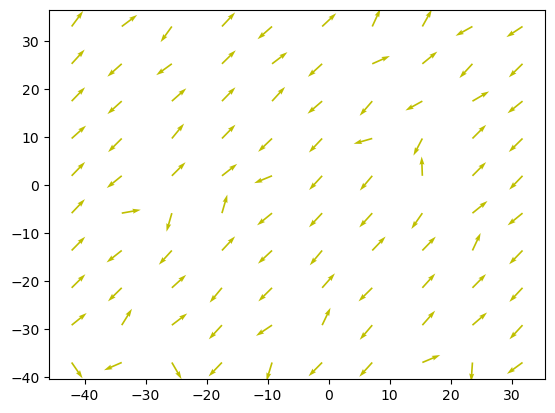

In [7]:
n=10
if True:
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            #j[0] -= j[2]
            #j[1] -= j[3]
            plt.quiver(j[0], j[1], j[2], j[3], color='y', units='xy', scale=l/3.5, width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.show()
            

### теперь построим для всех мышей векторные поля скорости

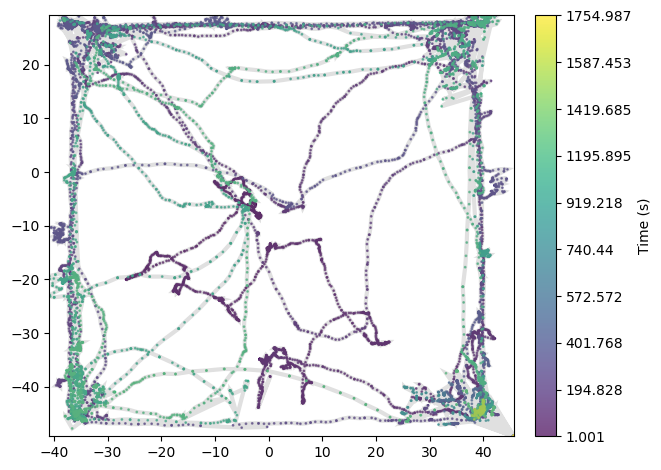

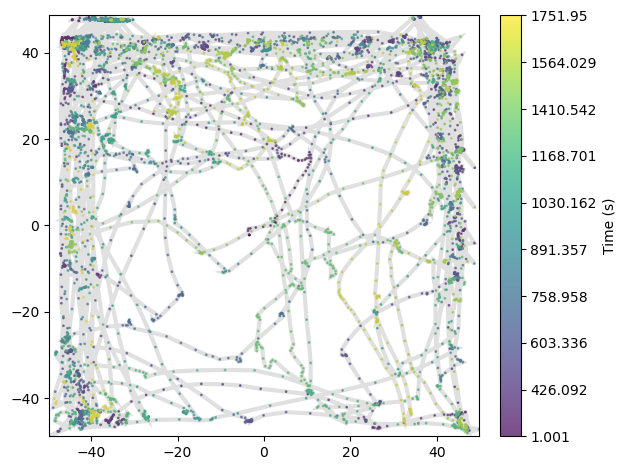

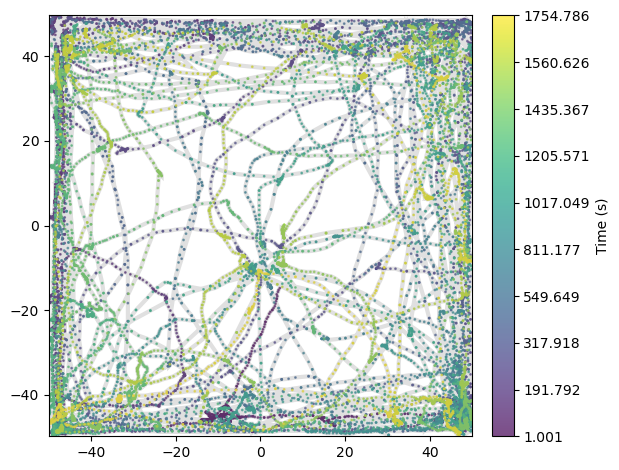

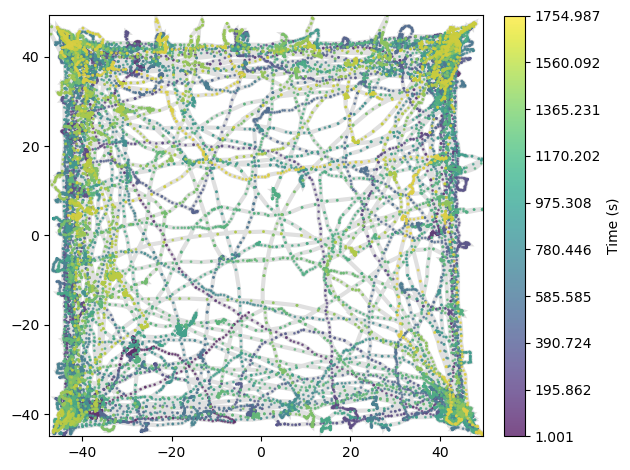

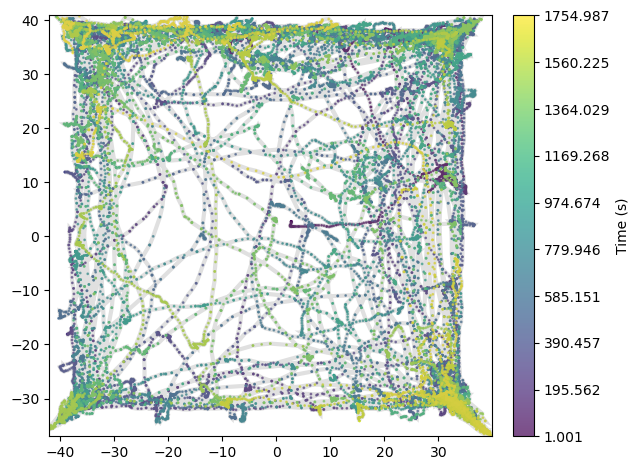

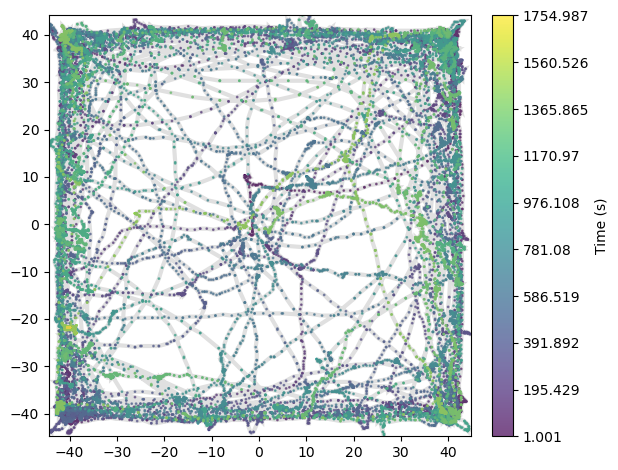

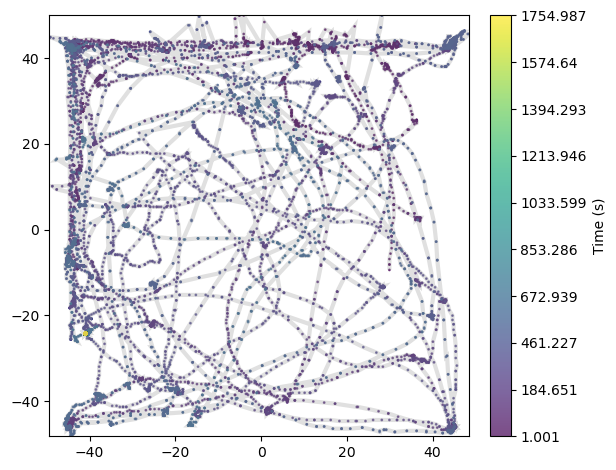

In [8]:
tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 

In [9]:
dfs = [tr4, tr3, tr5, tr6, tr7, tr91, tr92]

In [55]:
names = ['tr4','tr3','tr5','tr6','tr7', 'tr91','tr92']

In [10]:
for i in dfs:
    i = addFilteredV(i)

In [63]:
n=10
def buildVectorField(df, name):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    plt.figure()
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            plt.quiver(j[0], j[1], j[2], j[3], color='y', units='xy', scale=l/3.5, width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + 'VelocityField.png')
    plt.show()

(10, 10, 4)
0.21965177347839648 -0.899991807178141 0.9264082008380436
0.4074216715103259 0.3207287784063203 0.5185165066941249
0.5243178107356867 -0.1522253043149908 0.5459685979325688
1.0972220165824944 1.7803729603721494 2.0913211211331575
3.119794888989447 2.9769269776882115 4.312216875326721
9.712887814295735 8.707162906963532 13.044342665749632
3.668652934786092 5.0769752932859324 6.263760251202977
10.246611476281425 9.461570724546371 13.946840764899237
3.6133097195748967 2.9086002671611446 4.63853022451124
0.22789510729425458 1.3618004932161945 1.3807377604934727
-0.1547480836257159 0.5060215804273117 0.5291548065018269
0.7012644381292223 8.665911034243683 8.694238659342814
11.928581512847066 12.580465286351098 17.336642227655325
0.5932725634221434 0.34269789862009375 0.6851380767612535
nan nan nan
nan nan nan
-10.595564120225987 -10.938922092902832 15.229116703880694
-11.618100159073345 -13.91731035848758 18.129307182590452
-0.8029367657651822 -1.1137568202935397 1.3730119098419

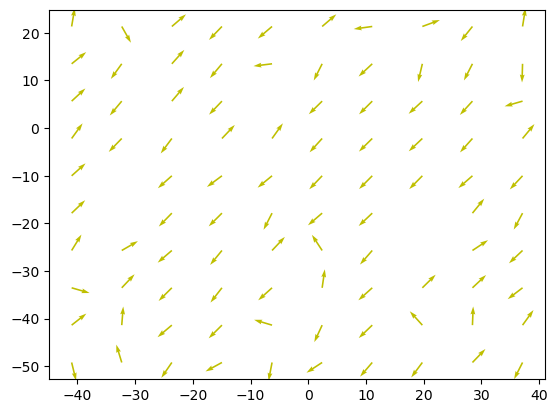

(10, 10, 4)
0.46346171638770023 -0.5382325225341547 0.7102753063921851
0.9161071258236917 -0.39389883220911026 0.997200359005474
1.4365931354737662 1.230897040880824 1.891800032281297
1.979809827710856 4.888509589958868 5.274198798397754
2.1199274666704824 0.910796789818655 2.3073021597285206
-1.9758827546419657 2.9886279315630873 3.5827377204325996
2.415026498412239 3.1043247653536405 3.9330885111857348
1.7418667147180136 0.9648580312728501 1.9912434990111696
0.054091963901966224 -0.3440174265158063 0.3482440671502241
-0.14672366044240565 -0.336255024939954 0.36687228613100153
0.012890550659092014 -0.5829512787654902 0.5830937829462898
2.7399044624417965 6.104928934927917 6.691579317607212
0.7036368851333183 -0.2677979829475156 0.7528749071332345
12.238387091125688 16.979858802517715 20.930688558804516
-0.7272006976247449 3.1898582564306164 3.271699336849963
2.822186241482101 0.3538652343669736 2.8442847581957156
-2.0606857563852836 -2.0608083159269395 2.914336408440662
-1.25885026074

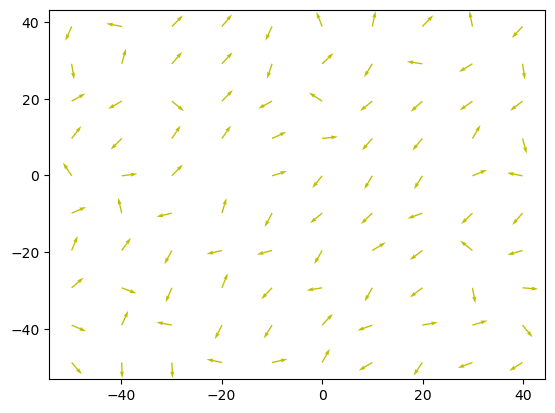

(10, 10, 4)
0.07465113311166825 -0.020863804040076595 0.07751187001923465
2.1853156526023008 1.7693140740301274 2.8117746698606036
1.3142740762992393 1.7860375605218313 2.2174865310136593
1.1122075271124634 0.40527360172247867 1.1837450213701983
2.5118405794091614 2.511592414405858 3.552103539097305
2.747053274872368 2.808813563182269 3.928833838138701
1.9132142763439046 2.4750418948230997 3.1282936640180776
2.2125730428542325 1.9483885508204242 2.948168484828055
1.5937697908508062 2.0604902436257233 2.604941878488926
1.3009319924861946 1.3388836762084384 1.8668244554567852
-0.05566965205893626 0.1728487461184597 0.1815923985057931
-2.6632783681162446 -3.1644887148193654 4.13606582301286
0.14168695624243227 -0.12223866819847437 0.18712959566081905
1.3205898931874471 1.7643571262414919 2.2038406782042954
2.0185023337245473 2.4570282658563016 3.1798332614255527
-1.8707643072969216 -3.2854374951693286 3.7807219718091734
0.4537951243409087 0.7400813346575325 0.8681304030985525
-0.403138049

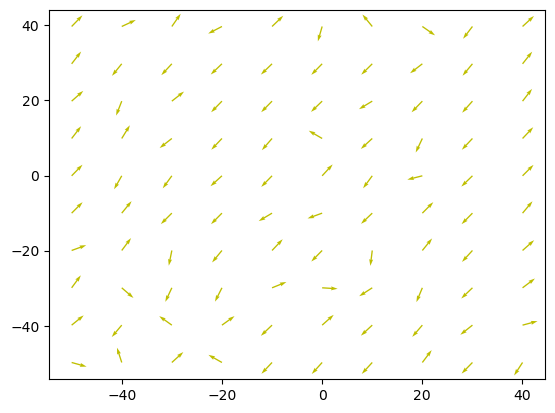

(10, 10, 4)
0.17288789993453213 0.06005931112738225 0.18302280403509422
1.750324914611485 1.7413831339222774 2.469018534928135
1.8053490891102464 2.0498052079315587 2.7314806834415903
2.4561011698822823 2.3761147707641372 3.417360730233293
2.59442904110265 2.290362303407454 3.460754474126518
1.0678593928144593 1.087163874495863 1.5238927038446382
2.9617959813333705 3.1269913986249587 4.307007156032711
2.8446513869949768 2.828320572187209 4.011413562896479
0.7845528622715463 1.0827116405505557 1.337081781448746
0.04797514715420872 0.09051432178827096 0.102442457961817
-0.6480229018722081 -0.529766007965835 0.8370099787618631
-0.9605968495399146 -1.3329578364517063 1.6430224895308108
1.1230106574264325 1.205686970397191 1.6476753343055497
0.25429854354565473 0.4706302659574494 0.5349398064124793
2.8687261808443787 2.0884235116970005 3.548394378429603
1.3130771497219325 1.3337716606777454 1.871661947027012
-2.4073330152198595 -2.359068627448554 3.3705277087096537
-1.4159609878234773 -1.65

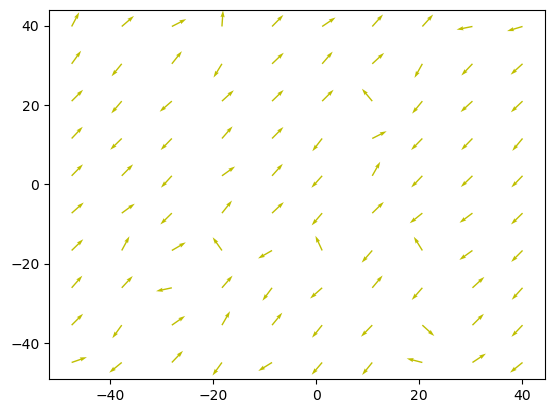

(10, 10, 4)
0.05920490473084595 -0.08577843934825936 0.10422649088025344
2.39077301937237 1.9303298775328983 3.0727787206785737
6.619027208981502 6.537019473312533 9.302910554643892
13.60541643483646 13.801426024959033 19.380059769973222
3.4534147275768743 3.6400913384586095 5.017602837308494
8.088728873854887 8.345156911810596 11.62192663362981
2.9849271739022316 2.665071301247173 4.00154910931145
3.424380026521116 3.5358865471339582 4.922283234459357
2.2429724363604984 2.4521733882963876 3.323263407637429
0.16755184070029117 0.22574099503629144 0.28112740201202496
-0.5765030171985477 -0.25143010202088223 0.6289458045342701
0.5936376701120847 0.9523774001094387 1.1222425743195266
-3.9894641057489664 -3.9229231166102942 5.59510050221574
-3.814184842907028 -3.0118309592604113 4.859951825174937
1.252901050236309 0.22264049160005622 1.27252891133489
-1.326689491258604 -1.0791509870002904 1.7101672020477163
-3.584517755505527 -3.5845351914854393 5.069285953517708
-2.375384174053722 -2.1426

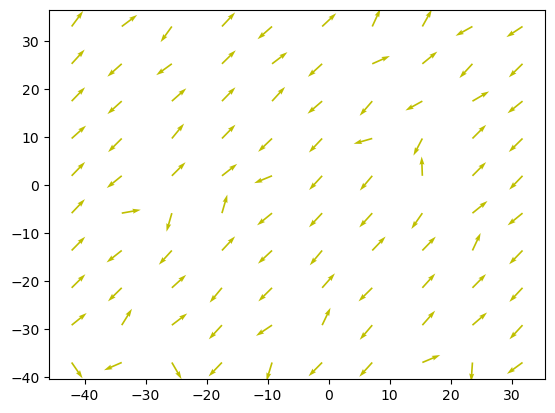

(10, 10, 4)
-0.41793408116557323 -0.42169728085861446 0.5937149929749637
-3.5427788191563105 -3.358595046891597 4.881745840420961
-0.6135424617667095 -0.6216108713683713 0.8734039316342125
-12.356739719417677 -12.48363546271849 17.56502692453038
-3.1234430930443935 -3.1796337423092322 4.457125473970655
-15.072243475062404 -15.659045675682107 21.73426407414476
-9.78566004016413 -9.99112269470853 13.985051845537965
-13.545346642514488 -14.475871340268696 19.824915301859203
-5.686104358897981 -5.456443890235571 7.88064481546832
-0.6140757239520757 -0.37436691426409857 0.7191937021713196
-1.0385073669848854 -1.1051794520675513 1.516548440556454
-2.621924687956201 -2.8850715815203243 3.8984775361428476
0.6251206561493073 -0.012262859689482233 0.6252409235425209
1.944663939233704 3.854184257431281 4.316995960941712
5.144687658217741 4.636422272251899 6.925620736601984
3.6307886660261417 3.659358288763928 5.154951932160876
3.5138935319368327 3.3787177792483565 4.874749386952775
9.412624355978

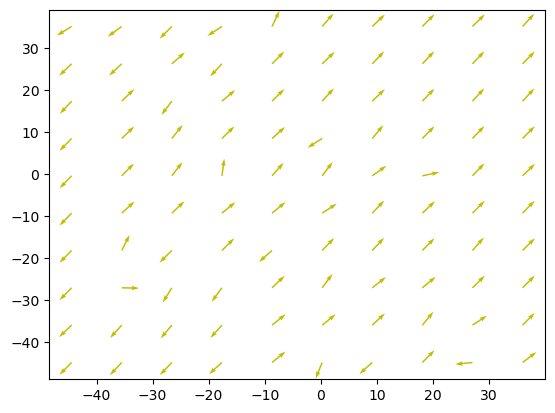

(10, 10, 4)
-0.333041301917058 -0.3956058153032859 0.5171271312592162
nan nan nan
-0.014492044116322959 -0.015156141698910743 0.020969691792368145
-5.036368274062211 -5.085511555719068 7.1573342226930095
-5.629406312178817 -5.520313428401394 7.884419812223818
-7.488685404930781 -8.937576503752306 11.660217959131321
-3.531793408793829 -4.134303674290433 5.43746554505414
-1.7835729314914857 -2.063752688441928 2.7276743869091886
0.005306541834637025 -0.2106715632591635 0.2107383850946535
-0.11113312596808533 0.11908085858869155 0.1628828492188735
-0.8442060827813247 -1.1708158693444228 1.4434312280513144
-6.992373599728323 -6.939539029142249 9.851420734856784
-14.31629975568821 -15.732312126206692 21.271156139972938
-11.419473538326445 -11.1047373773834 15.928577090035187
-6.10422949909154 -6.026839504503247 8.578135706003975
-0.9355384751299857 -0.8353238264997945 1.254192223531464
2.2265830878456887 1.6817099567077889 2.7903083387988783
0.9185874461577278 1.0614177489168999 1.4037131238

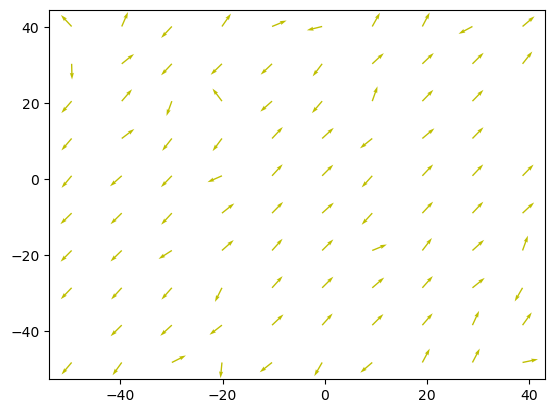

In [65]:
for i in range(len(dfs)):
    buildVectorField(dfs[i], names[i])

### Bad Improved divergency

In [56]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            #dt = df['time'][i]-df['time'][i-1]
            div.append(df['Vx'][i]/dx + df['Vy'][i]/dy)
    df.insert(6, "divergence", div)
    print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    df = df.loc[:, 'divergence']
    dfn = df.groupby([x_cut, y_cut]).mean()
    print(dfn)
    #dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    #??
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + '_filteredV_diverge.png')
    return dfn

In [61]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            #dt = df['time'][i]-df['time'][i-1]
            div.append(df['Vx'][i]/dx + df['Vy'][i]/dy)
    df.insert(6, "divergence", div)
    #print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    #df = df.loc[:, 'divergence']
    dfn = df.groupby([x_cut, y_cut]).mean()
    print(dfn)
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    #??
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + '_filteredV_diverge.png')
    return dfn

In [57]:
dfsnames = ['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']
#можно конечно переделать это в словарь, но и так имена соотвествуют порядку объектов в dfs

In [22]:
for i in range(len(names)):
    divMap(dfs[i],15,names[i])
    

           time       x       y        Vx   Vy  divergence
0         1.001  -3.355  -5.324  0.000000  0.0    4.798430
1         1.034  -3.355  -5.324  0.000000  0.0    5.059867
2         1.068  -3.355  -5.324  0.000000  0.0    5.566066
3         1.101  -3.355  -5.324  0.000000  0.0    6.290519
4         1.134  -3.282  -5.324  2.212121  0.0    7.197515
...         ...     ...     ...       ...  ...         ...
45184  1754.853  45.655 -49.228  0.000000  0.0    0.000000
45185  1754.886  45.655 -49.228  0.000000  0.0    0.000000
45186  1754.920  45.655 -49.228  0.000000  0.0    0.000000
45187  1754.953  45.655 -49.228  0.000000  0.0    0.000000
45188  1754.987  45.655 -49.228  0.000000  0.0    0.000000

[45189 rows x 6 columns]
          time       x      y        Vx        Vy  divergence
0        1.001  -3.409 -2.178  0.000000  0.000000    8.240964
1        1.134  -3.409 -2.178  0.000000  0.000000    8.476343
2        1.268  -3.409 -2.178  0.000000  0.000000    8.922884
3        1.401  -3

In [ ]:
plt.savefig('books_read.png')

### New improved divergency

In [4]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [5]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            vx.append((df['x'][i]-df['x'][i-1])/(df['time'][i]-df['time'][i-1]))
            vy.append((df['y'][i]-df['y'][i-1])/(df['time'][i]-df['time'][i-1]))
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            div.append(vvx/dx + vvy/dy)
    #d3 = gaussian_filter1d(div, 3)
    d5 = gaussian_filter1d(div, 5)
    #plt.plot(div, 'k', label='original data')
    #plt.plot(d3, '--', label='filtered, sigma=3')
    #plt.plot(d5, '--', label='filtered, sigma=5')
    #plt.legend()
    #plt.grid()
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "divergence", d5)
    print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + 'diverge.png')
    return dfn

In [6]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']

In [8]:
for i in range(len(names)):
    divMap(dfs[i],20,names[i])

           time       x       y        Vx   Vy  divergence
0         1.001  -3.355  -5.324  0.000000  0.0    4.798430
1         1.034  -3.355  -5.324  0.000000  0.0    5.059867
2         1.068  -3.355  -5.324  0.000000  0.0    5.566066
3         1.101  -3.355  -5.324  0.000000  0.0    6.290519
4         1.134  -3.282  -5.324  2.212121  0.0    7.197515
...         ...     ...     ...       ...  ...         ...
45184  1754.853  45.655 -49.228  0.000000  0.0    0.000000
45185  1754.886  45.655 -49.228  0.000000  0.0    0.000000
45186  1754.920  45.655 -49.228  0.000000  0.0    0.000000
45187  1754.953  45.655 -49.228  0.000000  0.0    0.000000
45188  1754.987  45.655 -49.228  0.000000  0.0    0.000000

[45189 rows x 6 columns]
          time       x      y        Vx        Vy  divergence
0        1.001  -3.409 -2.178  0.000000  0.000000    8.240964
1        1.134  -3.409 -2.178  0.000000  0.000000    8.476343
2        1.268  -3.409 -2.178  0.000000  0.000000    8.922884
3        1.401  -3

### автокорелляция

In [13]:
    #''' Statsmodels '''

import statsmodels.api as sm

In [15]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']

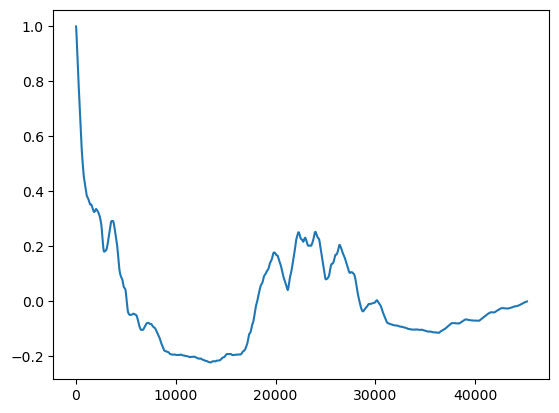

45189


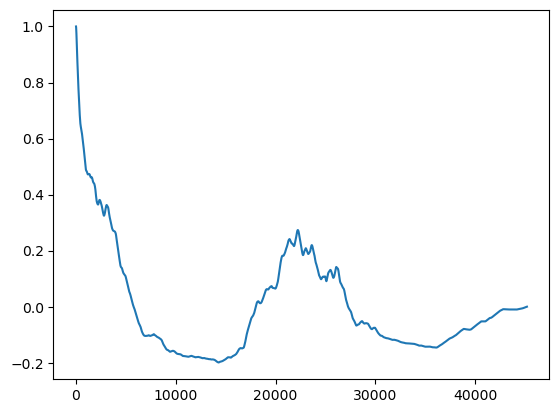

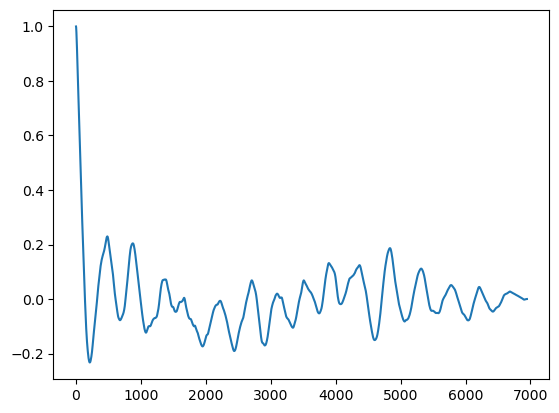

6946


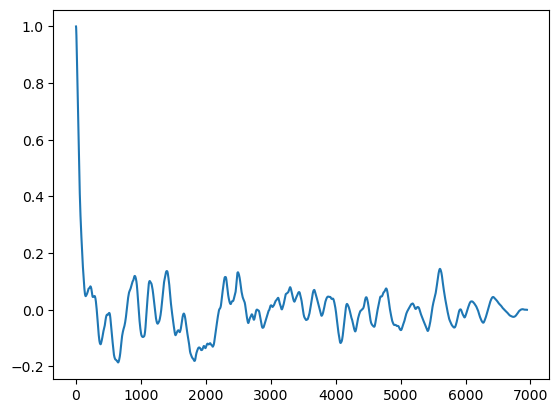

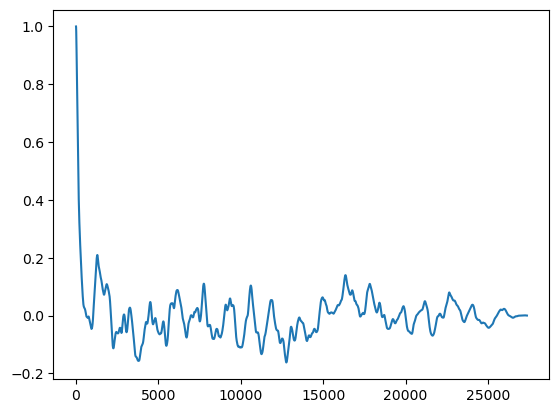

27369


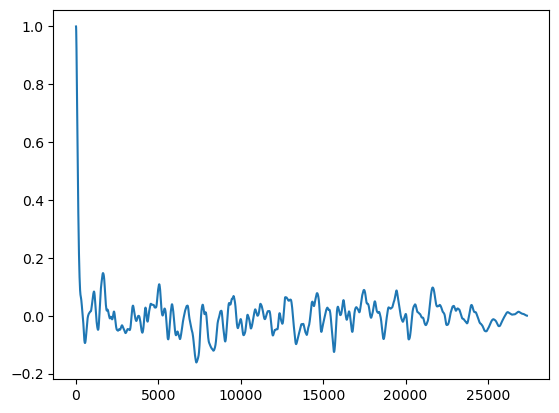

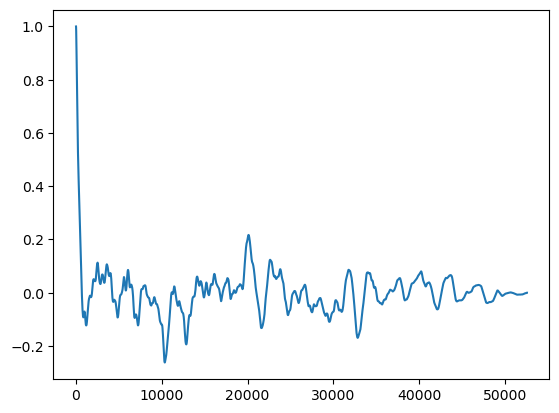

52562


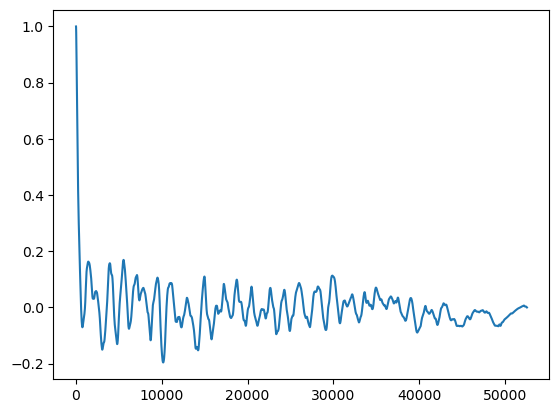

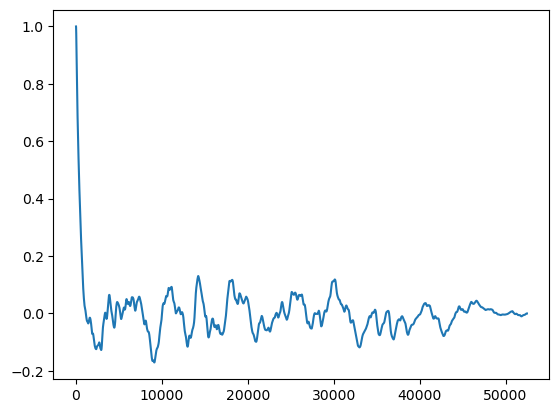

52485


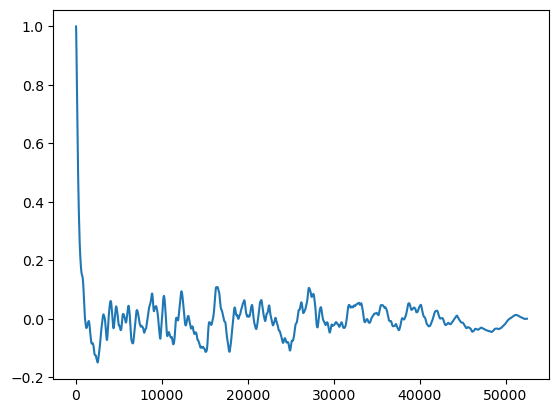

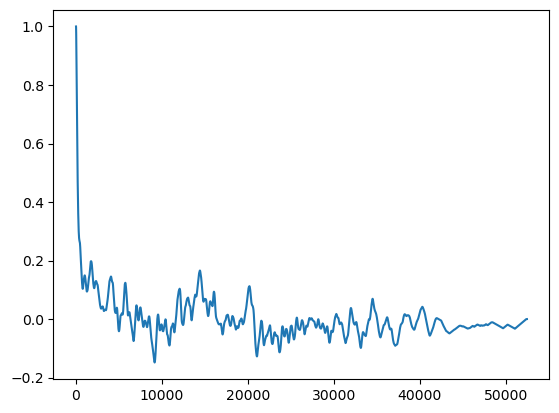

52450


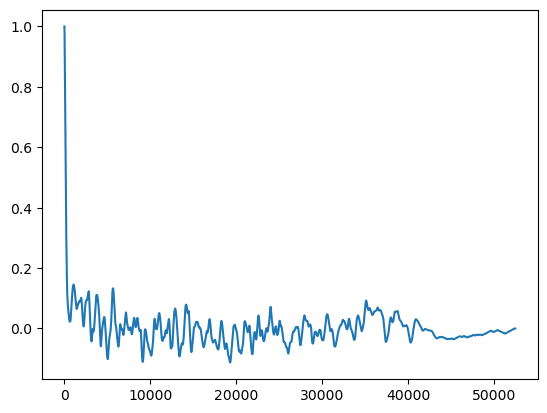

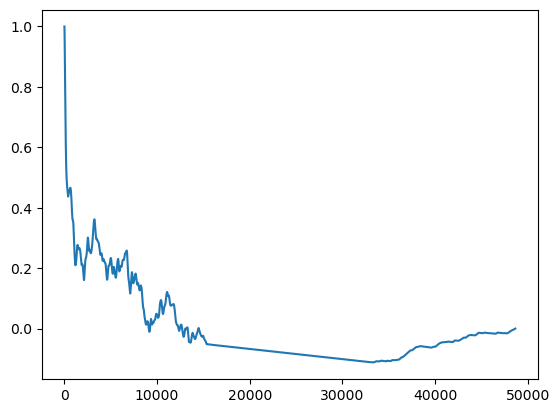

48644


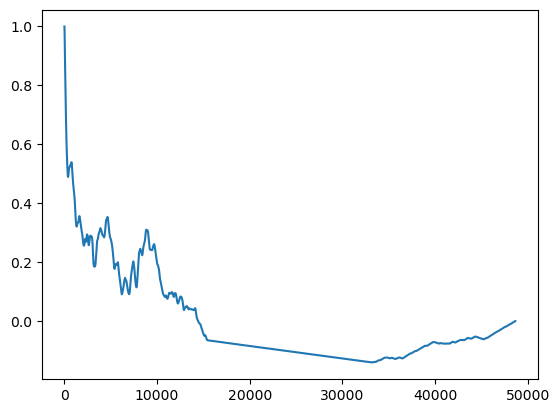

In [14]:
for i in dfs:
    # Delay (lag) range that we are interesting in
    lags = range(len(i))
    datax = i['x']
    acorrx = sm.tsa.acf(datax, nlags = len(lags)-1, fft=False)
    acorrx
    plt.figure()
    plt.plot(acorrx)
    plt.show()
    
    # Our data set 
    datay = i['y']
    print(len(datay))
    # Delay (lag) range that we are interesting in
    lags = range(len(datay))
    #''' Statsmodels '''

    acorry = sm.tsa.acf(datay, nlags = len(lags)-1, fft=False)
    plt.figure()
    plt.plot(acorry)
    plt.show()

### снова черновик: рисуем скорости до сглаживания и после

In [61]:
x = df['x']
v3 = gaussian_filter1d(x, 3)
v5 = gaussian_filter1d(x, 5)
plt.plot(x, 'k', label='original data')
plt.plot(v3, '--', label='filtered, sigma=3')
plt.plot(v5, '--', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()

In [26]:
def addV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    return(df)

In [27]:
df = openFile('Trace_7.txt')
df = addV(df)

In [28]:
v = df['V']
v3 = gaussian_filter1d(v, 3)
v5 = gaussian_filter1d(v, 5)
plt.figure()
plt.plot(v, 'k', label='original data')
plt.plot(v3, '--', label='filtered, sigma=3')
plt.plot(v5, '--', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()